In [8]:
'''
code/notebook/bot_notebook.ipynb

2048-intelligent-bot: Analysis of the bot performance.

Author: Filip J. Cierkosz 2022 (updated: 2023)
'''

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [9]:
# Centering plots.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [10]:
# Create the dataframe for the database records.
db = sqlite3.connect('../db/bot_records_2023.db')
df = pd.read_sql_query("SELECT * FROM bot_records_2023", db)

In [11]:
# Show the latest 5 records.
df.tail(5)

,id,score,win,time_played_sec,date_played
296,298,2048,1,101.329781,21 Aug 2023 06:53:39 AM
297,299,2048,1,99.210868,21 Aug 2023 06:55:19 AM
298,300,1024,0,47.986255,21 Aug 2023 08:19:30 AM
299,301,2048,1,93.459925,21 Aug 2023 08:21:04 AM
300,302,2048,1,101.825676,21 Aug 2023 08:25:31 AM


In [12]:
# Show the initial 5 records.
df.head(5)

,id,score,win,time_played_sec,date_played
0,1,2048,1,105.685521,20 Aug 2023 11:13:32 PM
1,2,2048,1,99.815401,20 Aug 2023 11:15:13 PM
2,3,1024,0,77.247424,20 Aug 2023 11:16:31 PM
3,4,1024,0,98.692646,20 Aug 2023 11:18:11 PM
4,5,1024,0,98.114124,20 Aug 2023 11:19:50 PM


In [13]:
# Calculate the probability of bot winning a game.
df_win = df[df['win']==1]
df_loss = df[df['win']==0]
win_prob = len(df_win)/len(df)
print(f'All sample runs of the bot : {len(df)}')
print(f'Bot wins : {len(df_win)}')
print(f'Bot wins : {len(df_loss)}')
print(f'Probability for a bot win : {win_prob}')

All sample runs of the bot : 301
Bot wins : 211
Bot wins : 90
Probability for a bot win : 0.7009966777408638


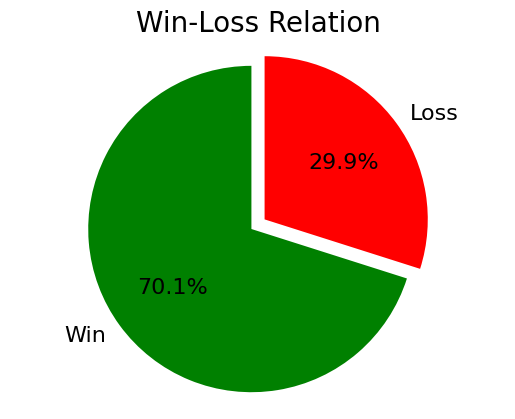

In [15]:
# Pie chart for win-loss relation.
labels = ('Win', 'Loss')
results = [len(df_win), len(df_loss)]
colors = ['green', 'red']
explode = (0, 0.1)
fig1, ax = plt.subplots()
ax.pie(results, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize':16})
ax.axis('equal')
plt.title('Win-Loss Relation', fontsize=20)
plt.show()

In [16]:
# Runtime analysis in seconds (reference: tests were run on a device with M1 chip).
avg_time_l = df_loss['time_played_sec'].mean()
avg_time_w = df_win['time_played_sec'].mean()
max_time_w = df_win['time_played_sec'].max()
min_time_w = df_win['time_played_sec'].min()
print(f'Average time to lose (sec) : {avg_time_l:.2f}')
print(f'Average time to win (sec) : {avg_time_w:.2f}')
print(f'Max time to win (sec) : {max_time_w:.2f}')
print(f'Min time to win (sec) : {min_time_w:.2f}')

Average time to lose (sec) : 73.32
Average time to win (sec) : 100.16
Max time to win (sec) : 117.67
Min time to win (sec) : 89.43


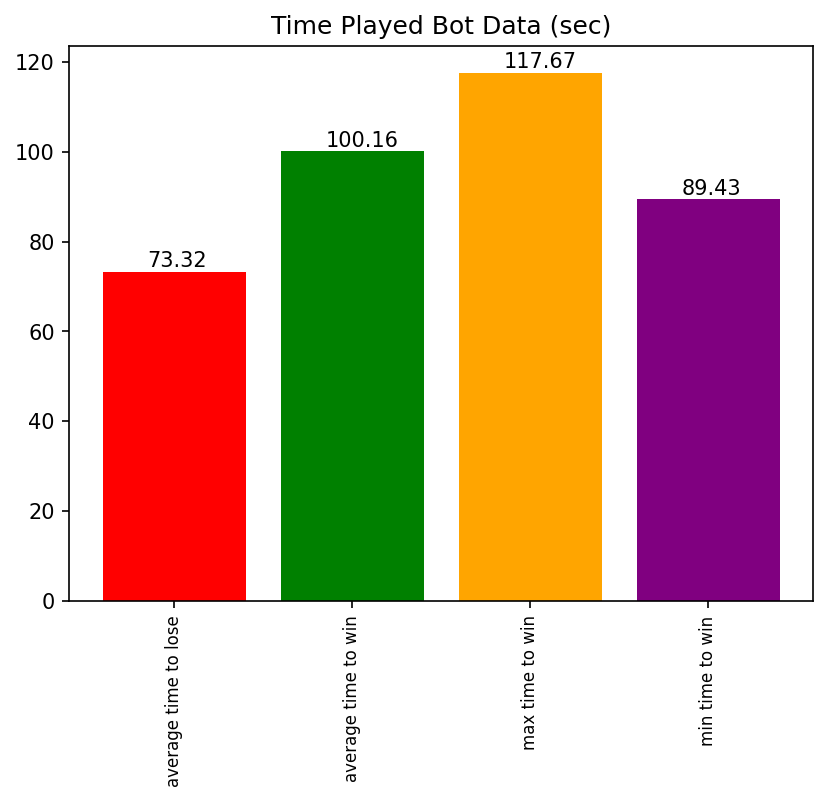

In [17]:
# Bar charts for the recorded times played.
plt.figure(dpi=150)
plt.title('Time Played Bot Data (sec)')
plt.xticks(rotation=90, fontsize=8)
colors = ['red', 'green', 'orange', 'purple']
labels = ['average time to lose', 'average time to win', 'max time to win', 'min time to win']
res_times = [avg_time_l, avg_time_w, max_time_w, min_time_w]
plt.bar(labels, res_times, color=colors)
# Add labels at the top of each bar.
for i in range(len(labels)):
    plt.text(i-0.15, res_times[i]+1, f'{res_times[i]:.2f}')

In [18]:
# Count occurrences of different scores.
scores_count = df.value_counts(['score'])
scores_count

score
2048     211
1024      71
512       19
Name: count, dtype: int64

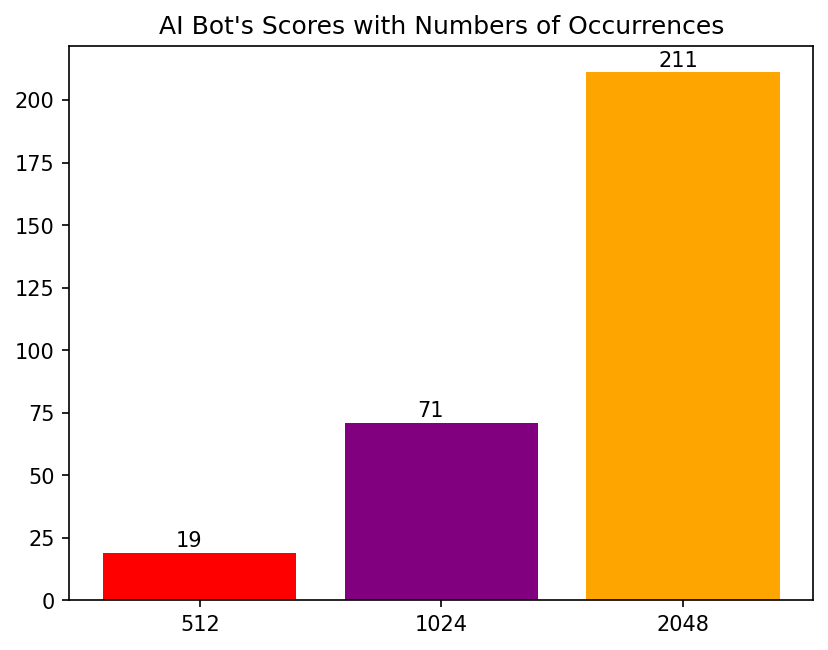

In [19]:
# Bar chart for the scores.
plt.figure(dpi=150)
plt.title("AI Bot's Scores with Numbers of Occurrences")
colors = ['red', 'purple', 'orange', 'green']
score, counter = np.unique(np.array(df['score']), return_counts=True)
scores_dict = dict(zip(score, counter))
labels = [str(i) for i in scores_dict.keys()]
plt.bar(labels, scores_dict.values(), color=colors)
# Add labels at the top of each bar.
for i in range(len(labels)):
    plt.text(i-0.1, list(scores_dict.values())[i]+2.5, list(scores_dict.values())[i])

In [20]:
# Calculate probability of a score greater or equal to 1024, or lower.
prob_score_upper_bound = len(df[df['score']>=1024])/len(df)
print(f'Probability of a score greater or equal to 1024 : {prob_score_upper_bound}')
prob_score_lower_bound = 1-prob_score_upper_bound
print(f'Probability of a score lower than 1024 : {prob_score_lower_bound}')

Probability of a score greater or equal to 1024 : 0.9368770764119602
Probability of a score lower than 1024 : 0.06312292358803984


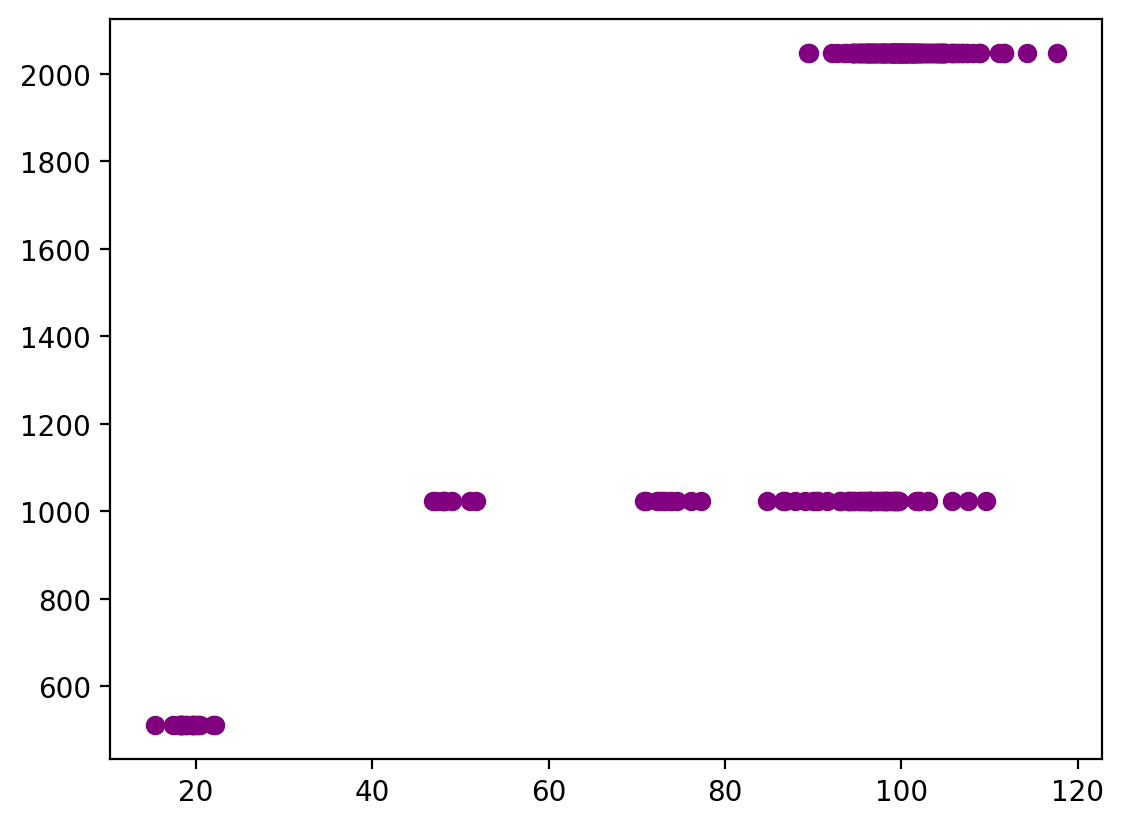

In [21]:
# Scatter diagram showing the time played and obtained score.
plt.figure(dpi=200)
plt.scatter(x=df['time_played_sec'], y=df['score'], color='purple')